Miguel Esteban Pinilla leal
Cod. 20191005036

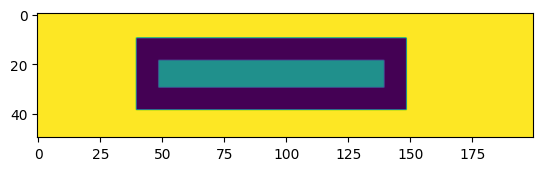

In [4]:
import matplotlib.pyplot as plt
import numpy as np

alto = 50;
ancho = 200;

mi_arreglo = np.zeros((alto,ancho))

mi_arreglo[10:39,40:149] = 2;

mi_arreglo[19:30,49:140] = 1

plt.imshow(-mi_arreglo)

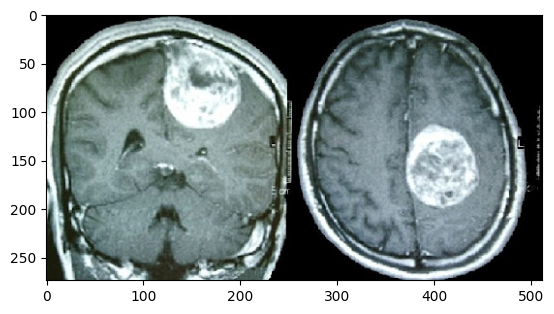

In [5]:
arch = 'image.png'
img_tmp=plt.imread(arch)
plt.imshow(img_tmp)

In [7]:
type(img_tmp)

numpy.ndarray

In [8]:
img_tmp.shape

(274, 512, 3)

In [9]:
img_tmp[175,250]

array([0.        , 0.00784314, 0.00392157], dtype=float32)

In [11]:
img_tmp.max(), img_tmp.min()

(1.0, 0.0)

(274, 512)


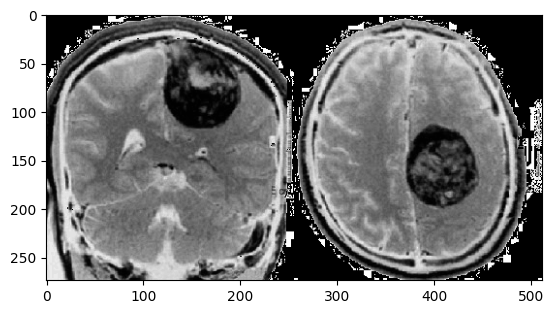

In [14]:
import cv2
arch='image.png'
img_tmp1=cv2.imread(arch,0)
print(img_tmp1.shape)
plt.imshow(-img_tmp1, cmap='gray')


In [24]:
img = img_tmp1.copy()
h,w=img.shape
h

274

In [25]:
w

512

In [26]:
img_resized = np.reshape(img_tmp1, (1,274,512,1))
img_resized.shape

(1, 274, 512, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


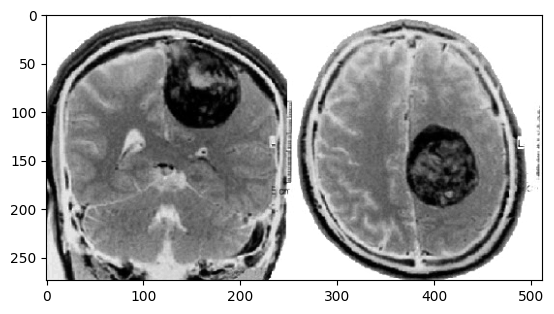

In [29]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model

input_img = Input(shape=(h, w, 1))

x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)

modelo1 = Model(input_img, x)
modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32),np.array([-50.0], dtype=np.float32)])

img1=modelo1.predict(img_resized)
img1.shape
plt.imshow(-img1.reshape(h,w), cmap='gray')
plt.show()

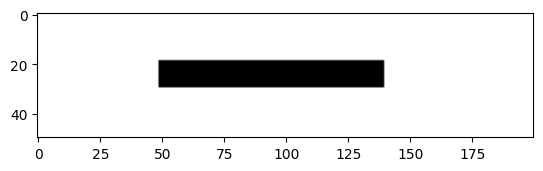

In [40]:
import matplotlib.pyplot as plt
import numpy as np

alto = 50;
ancho = 200;

mi_arreglo = np.zeros((alto,ancho))

#mi_arreglo[10:39,40:149] = 2;

mi_arreglo[19:30,49:140] = 1

plt.imshow(-mi_arreglo, cmap='gray')

arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


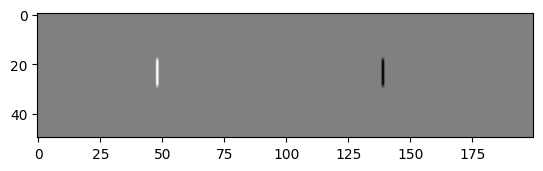

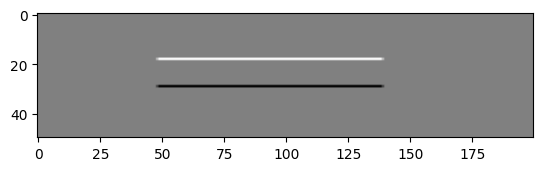

In [43]:
def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida


filtro1=[
    [1, -1],
    [1, -1]
]

filtro2=[
    [1, 1],
    [-1, -1]
]

filtros=reformar_filtros([filtro1,filtro2])


np.array(filtros).shape, filtros.shape


input_img3 = Input(shape=(50, 200, 1))

x = Conv2D(2, (2, 2), activation='linear', padding='same')(input_img3)

modelo3 = Model(input_img3, x)


modelo3.set_weights([filtros,np.array([0.0,0.0], dtype=np.float32)])

img_rezise = np.reshape(mi_arreglo, (1,50,200,1))

img_tmp3=modelo3.predict(img_rezise)

img_fin1 = np.reshape(img_tmp3[0,:,:,0],(50,200))
plt.imshow(-img_fin1, cmap='gray')
plt.show()

img_fin2 = np.reshape(img_tmp3[0,:,:,1],(50,200))
plt.imshow(-img_fin2, cmap='gray')
plt.show()





arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


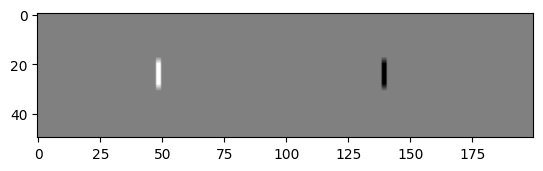

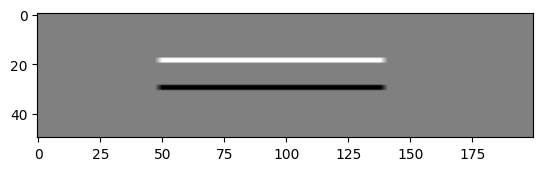

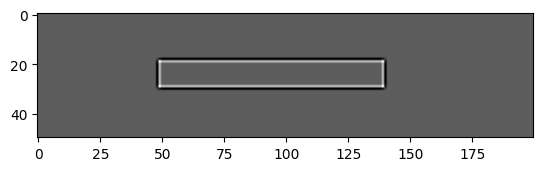

In [46]:
def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida


filtro1=[
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
]

filtro2=[
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

filtro3=[
    [1, 2, 1],
    [2, -12, 2],
    [1, 2, 1]
]

filtros=reformar_filtros([filtro1,filtro2,filtro3])


np.array(filtros).shape, filtros.shape


input_img3 = Input(shape=(50, 200, 1))

x = Conv2D(3, (3, 3), activation='linear', padding='same')(input_img3)

modelo3 = Model(input_img3, x)


modelo3.set_weights([filtros,np.array([0.0,0.0,0.0], dtype=np.float32)])

img_rezise = np.reshape(mi_arreglo, (1,50,200,1))

img_tmp3=modelo3.predict(img_rezise)

img_fin1 = np.reshape(img_tmp3[0,:,:,0],(50,200))
plt.imshow(-img_fin1, cmap='gray')
plt.show()

img_fin2 = np.reshape(img_tmp3[0,:,:,1],(50,200))
plt.imshow(-img_fin2, cmap='gray')
plt.show()

img_fin3 = np.reshape(img_tmp3[0,:,:,2],(50,200))
plt.imshow(-img_fin3, cmap='gray')
plt.show()






